<a href="https://colab.research.google.com/github/cernavcii/MyFirstRepo/blob/main/QS_World_University_Rankings_2025_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 22.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch



In [ ]:
data = pd.read_excel('QS 2025.xlsx', sheet_name='Sheet1',index_col=0)

In [ ]:
data.head()

,Unnamed: 1,Location,SIZE,FOCUS,RES.,STATUS,Academic Reputation 2025 score,Employer Reputation 2025 score,Faculty Student 2025 score,Citations per Faculty 2025 score,International Faculty 2025 score,International Students 2025 score,International Research Network 2025 score,Employment Outcomes 2025 score,Sustainability 2025 score,rank
University,,,,,,,,,,,,,,,,
Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,B,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,1
Imperial College London,UK,United Kingdom,L,FC,VH,A,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,2
University of Oxford,UK,United Kingdom,L,FC,VH,A,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,3
Harvard University,US,United States,L,FC,VH,B,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,4
University of Cambridge,UK,United Kingdom,L,FC,VH,A,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,5


**Tanımlayıcı İstatistikler**

In [ ]:
desc_stats = data.describe()

desc_stats

,Academic Reputation 2025 score,Employer Reputation 2025 score,Faculty Student 2025 score,Citations per Faculty 2025 score,International Faculty 2025 score,International Students 2025 score,International Research Network 2025 score,Employment Outcomes 2025 score,Sustainability 2025 score
count,1503.00000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,20.28656,19.786693,28.128676,23.503460,30.725374,25.580346,50.129095,23.825083,24.309299
std,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718
min,1.30000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,6.30000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,11.00000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,23.50000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


Bu tanımlayıcı istatistikler bize verinin genel dağılımı ve özellikleri hakkında bilgi verir.


**Üniversite boyutlarına göre dağılım grafiği**

<ipython-input-5-bed0e8df2701>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='SIZE', data=data, palette='viridis')


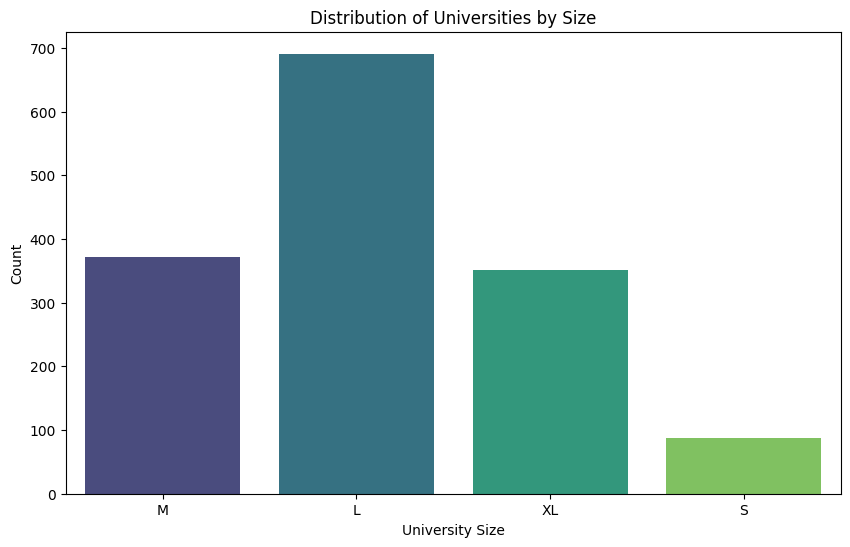

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='SIZE', data=data, palette='viridis')
plt.title('Distribution of Universities by Size')
plt.xlabel('University Size')
plt.ylabel('Count')
plt.show()

**Akademik puanların dağılım grafiği**

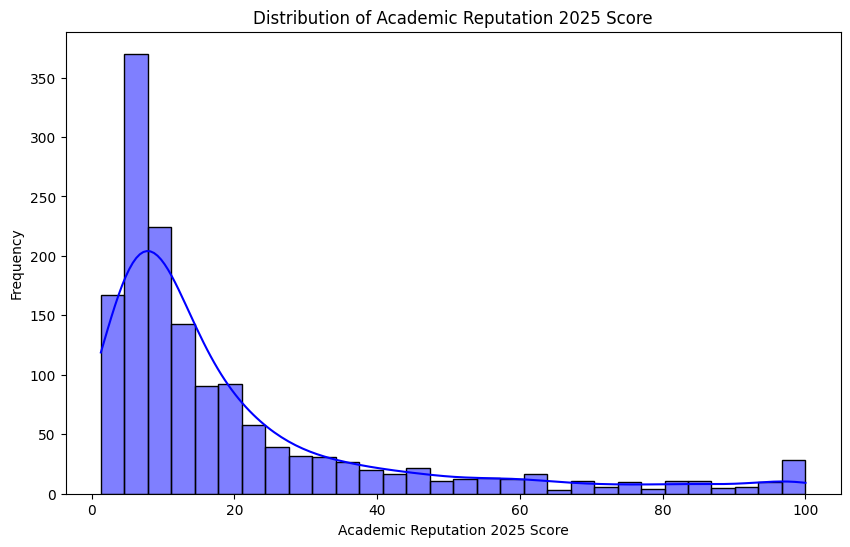

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Academic Reputation 2025 score'], bins=30, kde=True, color='blue')
plt.title('Distribution of Academic Reputation 2025 Score')
plt.xlabel('Academic Reputation 2025 Score')
plt.ylabel('Frequency')
plt.show()

Bu grafik, 2025 Academic Reputation skorlarının dağılımını gösterir. Skorlar genel olarak düşük değerlere doğru yoğunlaşmış durumda, ancak 100'e yakın yüksek skorlar da gözlemleniyor.

**Diğer kategorik degişkelerin skorların dağılımı**

In [ ]:
print(data.columns)

Index(['Unnamed: 1', 'Location', 'SIZE', 'FOCUS', 'RES.', 'STATUS',
       'Academic Reputation 2025 score', 'Employer Reputation 2025 score',
       'Faculty Student 2025 score', 'Citations per Faculty 2025 score',
       'International Faculty 2025 score', 'International Students 2025 score',
       'International Research Network 2025 score',
       'Employment Outcomes 2025 score', 'Sustainability 2025 score', 'rank'],
      dtype='object')


In [ ]:
data['SIZE'] = data['SIZE'].astype('category')
data['FOCUS'] = data['FOCUS'].astype('category')
data['RES.'] = data['RES.'].astype('category')
data['STATUS'] = data['STATUS'].astype('category')
categorical_variables = ['SIZE', 'FOCUS', 'RES.', 'STATUS']

<ipython-input-12-30b2d0076c57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Academic Reputation 2025 score', data=data, palette='viridis')
<ipython-input-12-30b2d0076c57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Academic Reputation 2025 score', data=data, palette='viridis')
<ipython-input-12-30b2d0076c57>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=var, y='Academic Reputation 2025 score', data=data, palette='viridis')
<ipython-input-12-30b2d0076c57>:5: FutureWarning: 

Passing `palette` without assigni

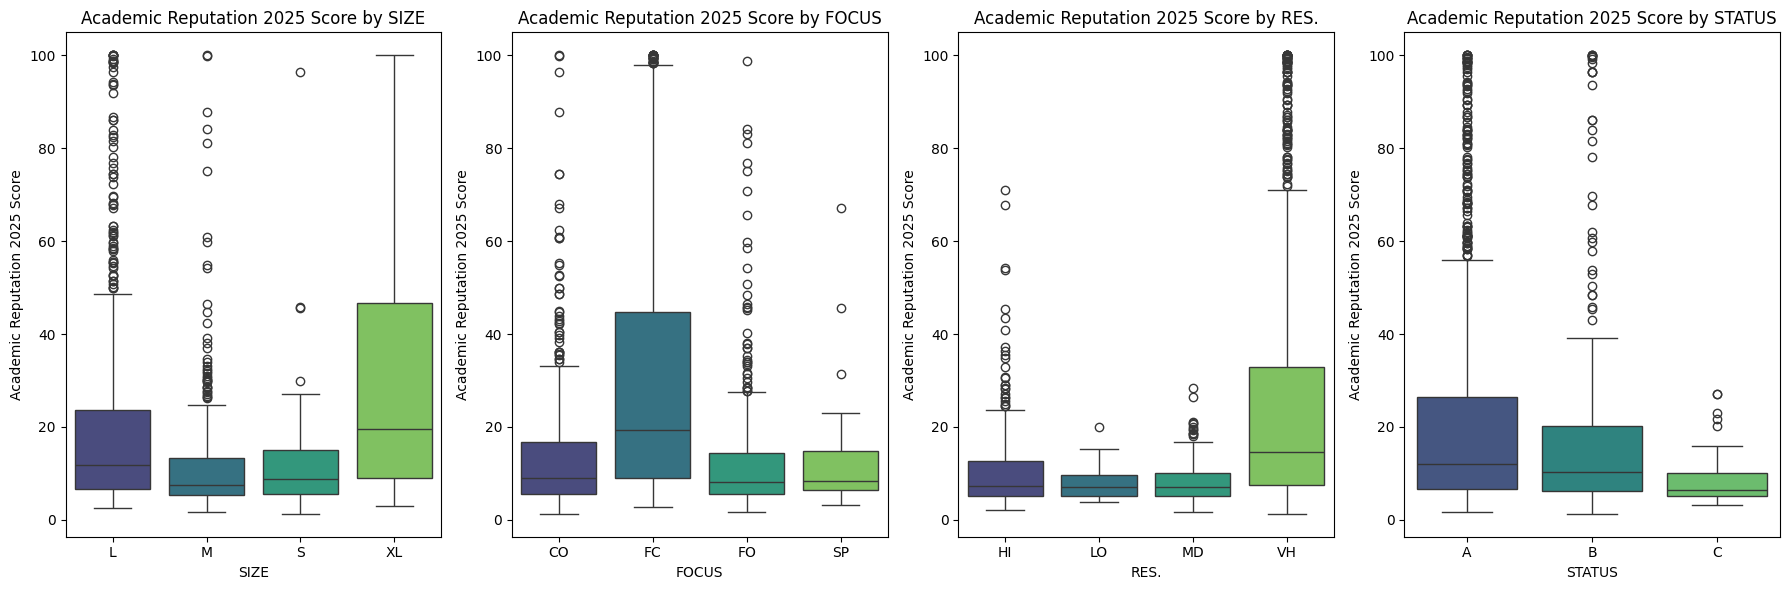

In [ ]:
plt.figure(figsize=(18, 6))

for i, var in enumerate(categorical_variables):
    plt.subplot(1, 4, i+1)
    sns.boxplot(x=var, y='Academic Reputation 2025 score', data=data, palette='viridis')
    plt.title(f'Academic Reputation 2025 Score by {var}')
    plt.xlabel(var)
    plt.ylabel('Academic Reputation 2025 Score')

plt.tight_layout()
plt.show()

**Academic Reputation 2025 Scroe by Size yorumu :**
*   XL boyutundaki kurumlar en yüksek ortalama akademik repütasyona sahiptir. Bunu sırasıyla L,M ve S boyutları takip eder. Burdan anlıyoruz ki genel olark büyük boyutlu kurumlar daha yüksek bir avantaja sahiptir. Grafik genel olarak, kurum boyutunun akademik repütasyon üzerinde önemli bir etkisi olduğunu göstermektedir.

**Academic Reputation 2025 Scroe by Size yorumu :**
*   FC kategorisi diğer tüm kategorilere göre belirgin şekilde daha yüksek bir medyan ve ortalama puana sahiptir. Bu, FC kategorisindeki kurumların genel olarak daha yüksek bir akademik prestije sahip olduğunu gösterirken , SP kategorisi en düşük başarıya sahiptir.Ancak, her kategoride hem çok başarılı hem de çok başarısız kurumlar bulunmaktadır. Bu durum, akademik başarının sadece FOCUS kategorisiyle değil, birçok farklı faktöre bağlı olduğunu göstermektedir.

**Academic Reputation 2025 Scroe by Res. yorumu :**
*   Grafik, farklı RES kategorilerindeki kurumların akademik başarıları arasında önemli farklılıklar olduğunu göstermektedir. VH kategorisi, diğer kategorilere göre daha yüksek bir başarıya sahiptir. Ardından onu HI ve MD kategorileri onu takip ediyor ve en düşük başarıya LO kategorisinin sahip olduğu görülüyor.

**Academic Reputation 2025 Scroe by STATUS. yorumu :**
*   Grafik STATUS A kategorisinin en yüksek ortalama ve medyana sahip kategori olduğunu gösterir . Bu, STATUS A kategorisindeki kurumların genel olarak en yüksek akademik prestije sahip olduğuna işarettir. Aytıca A (Public) ve B (Private) üniversiteleri arasında belirgin bir fark görülmemektedir, ancak her iki kategori de geniş bir dağılıma sahiptir.

















**Diğer skorların dağılımı**

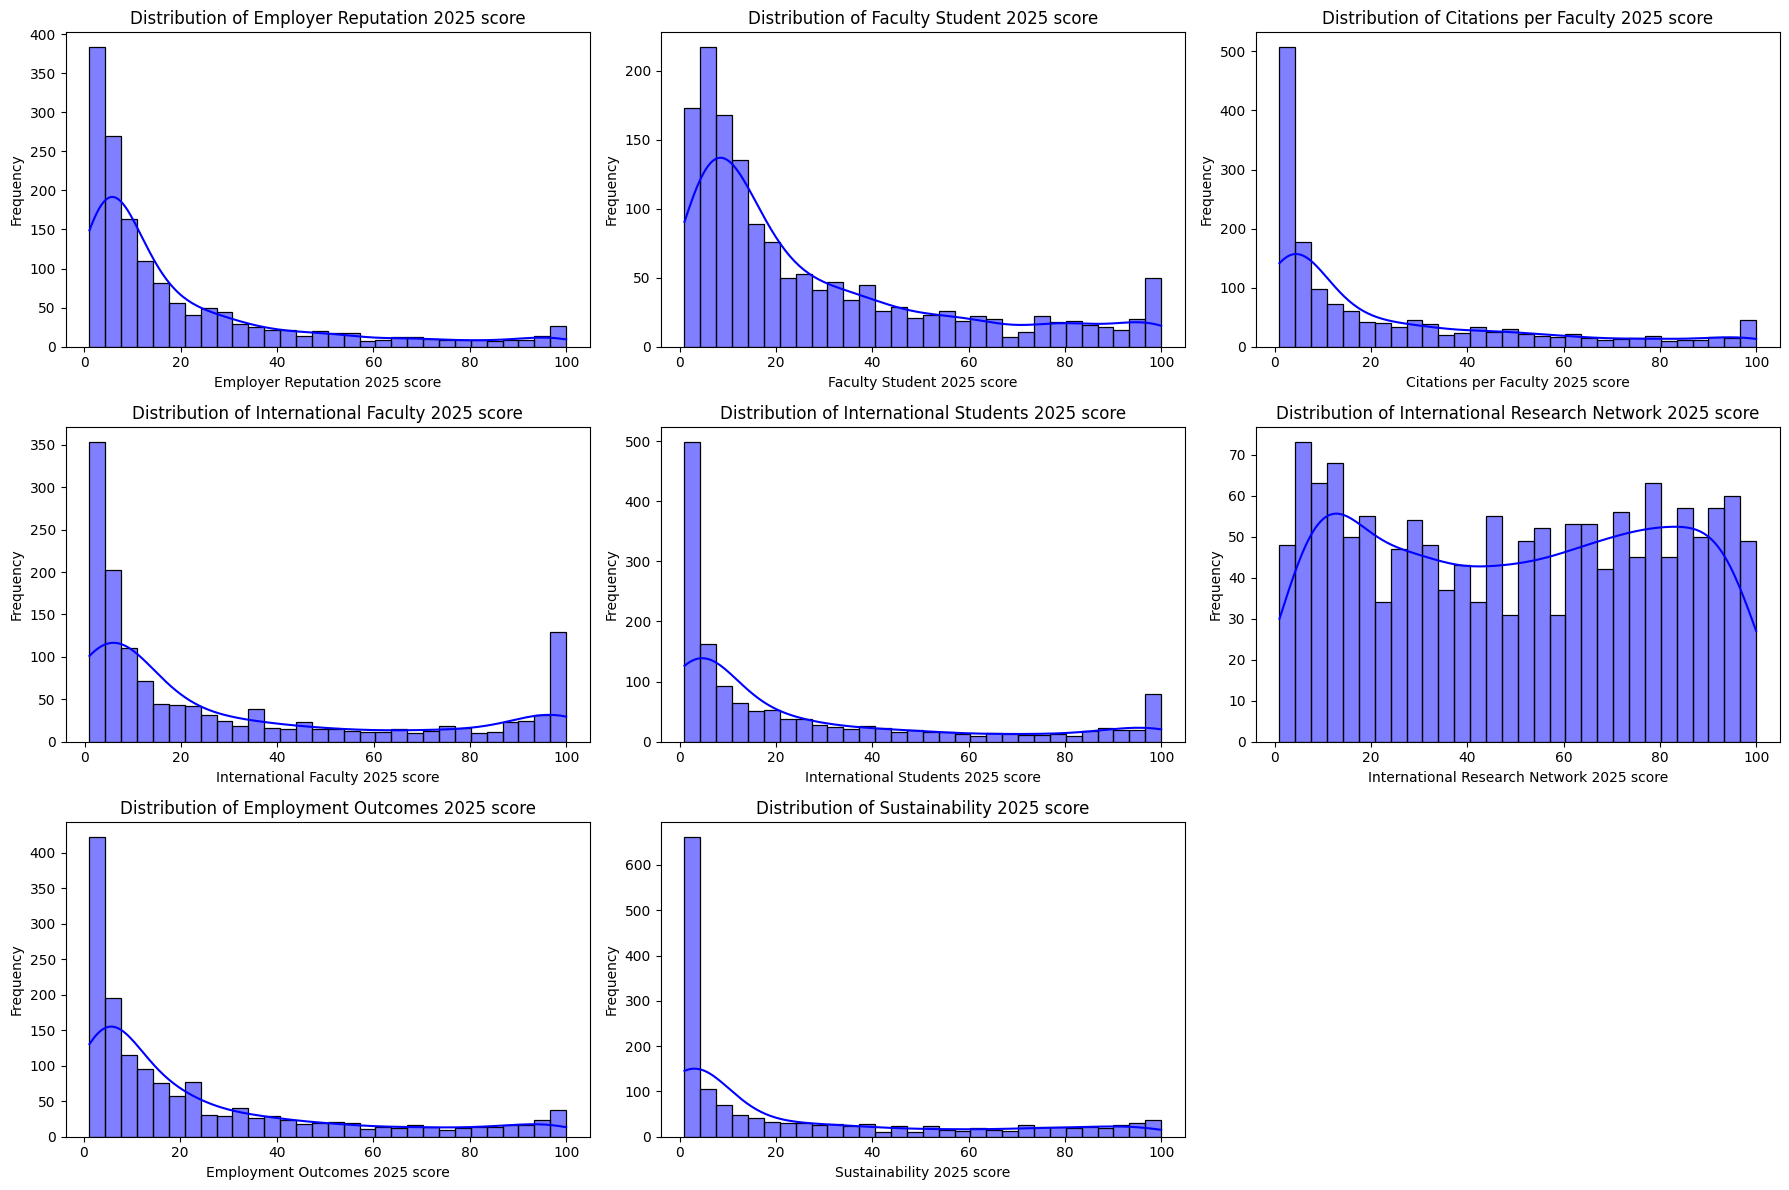

In [ ]:
score_columns = [
    'Employer Reputation 2025 score', 'Faculty Student 2025 score',
    'Citations per Faculty 2025 score', 'International Faculty 2025 score',
    'International Students 2025 score', 'International Research Network 2025 score',
    'Employment Outcomes 2025 score', 'Sustainability 2025 score'
]

plt.figure(figsize=(18, 12))

for i, col in enumerate(score_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Employer Reputation 2025 score:**
*   Çoğu skor düşük değerlere yoğunlaşmış, ancak yüksek skorlar da mevcut.

**Faculty Student 2025 score:**
*   Skorlar geniş bir dağılıma sahip, çoğu düşük ve orta değerlere yoğunlaşmış.

**Citations per Faculty 2025 score:**
*   Çoğu skor düşük değerlere yoğunlaşmış, ancak yüksek skorlar da mevcut.

**International Faculty 2025 score:**
*   Skorlar geniş bir dağılıma sahip, bazıları yüksek değerlere sahip.

**International Students 2025 score:**
*   Benzer şekilde, geniş bir dağılıma sahip ve bazı yüksek skorlar mevcut.

**International Research Network 2025 score:**
*   Daha dengeli bir dağılım, birçok skor orta değerlere yakın.

**Employment Outcomes 2025 score:**
*    Çoğu skor düşük değerlere yoğunlaşmış.

**Sustainability 2025 score:**
*   Geniş bir dağılıma sahip ve düşük değerler ağırlıklı.



Bu dağılımlar, her bir skorun veri setindeki yayılımını görmemizi sağlar.


**Size ve Score İlişkisini Görselleştirme**

<ipython-input-35-05aaa5bb0f7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SIZE', y=col, data=data, palette='viridis')
<ipython-input-35-05aaa5bb0f7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SIZE', y=col, data=data, palette='viridis')
<ipython-input-35-05aaa5bb0f7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='SIZE', y=col, data=data, palette='viridis')
<ipython-input-35-05aaa5bb0f7f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

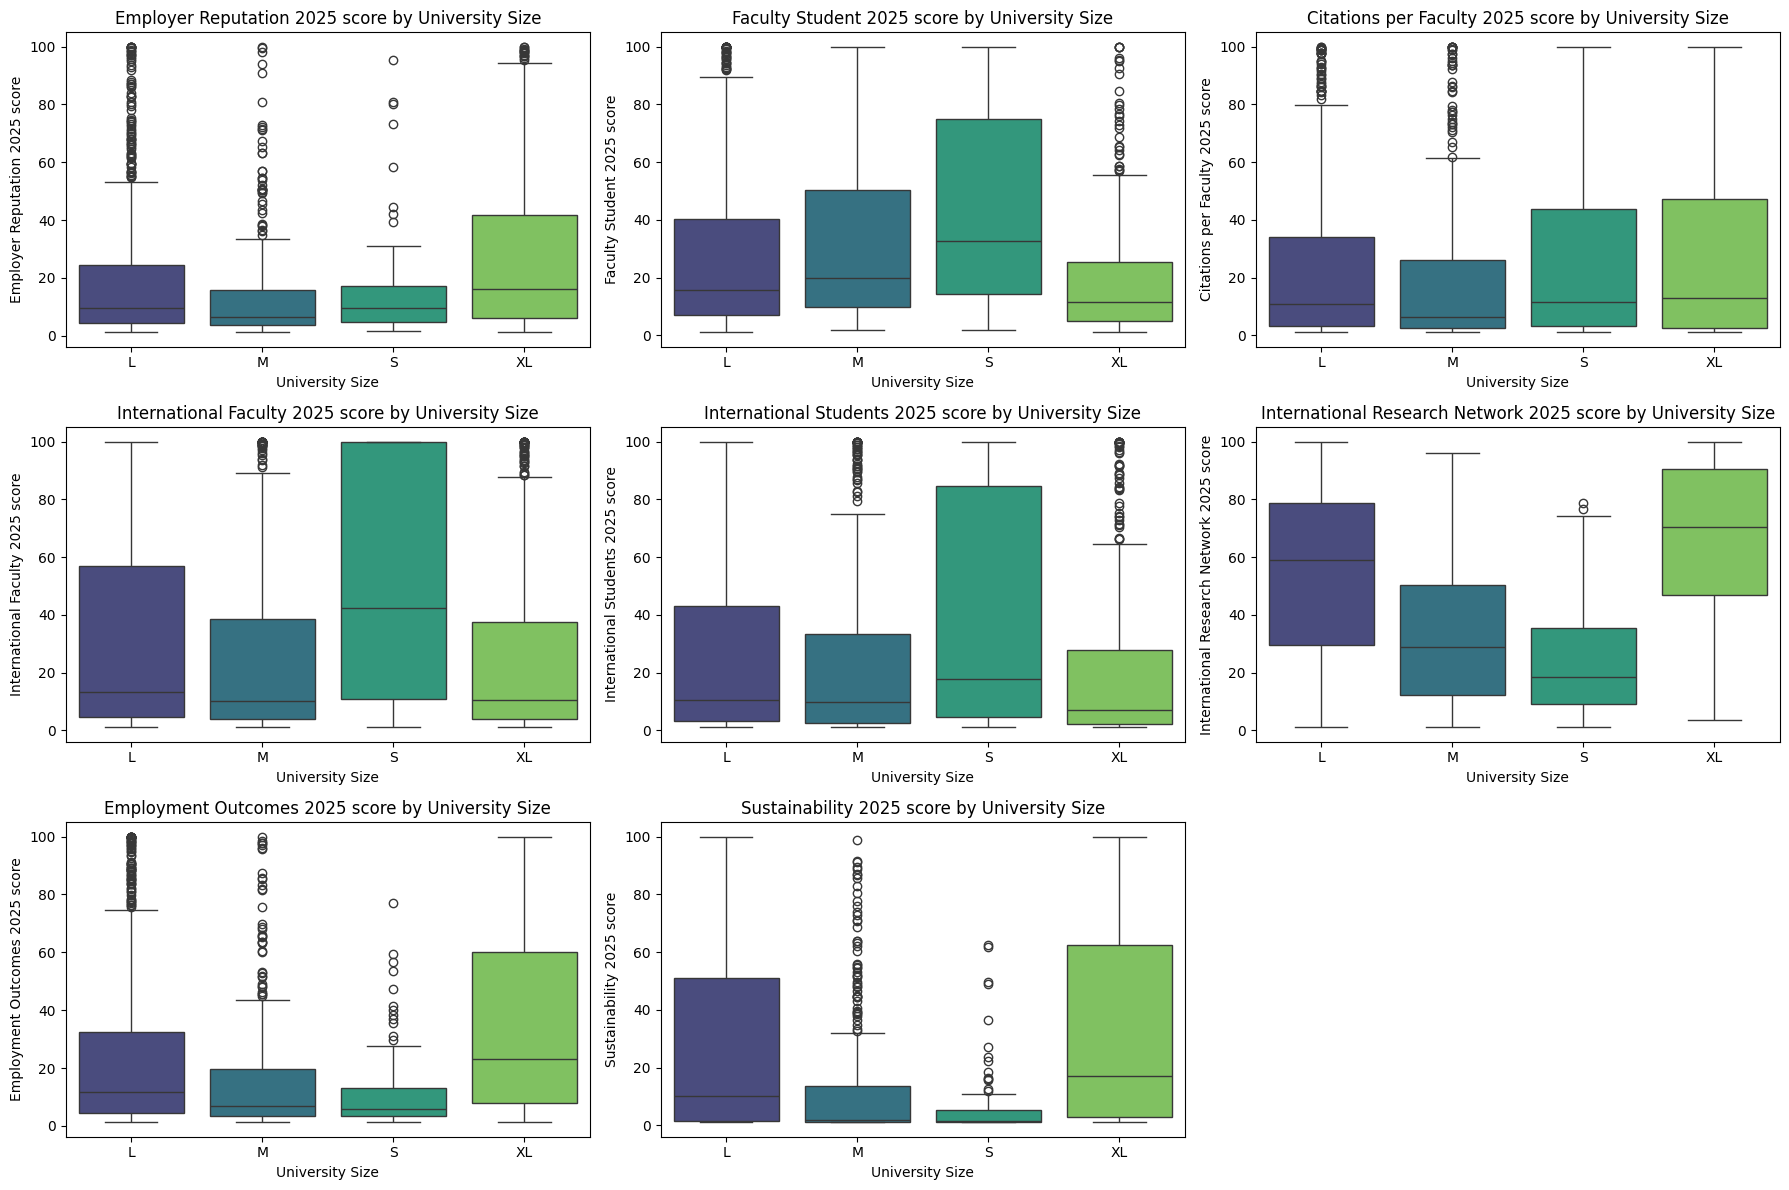

In [ ]:
# Create box plots to show the relationship between university size and various scores
plt.figure(figsize=(18, 12))

for i, col in enumerate(score_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='SIZE', y=col, data=data, palette='viridis')
    plt.title(f'{col} by University Size')
    plt.xlabel('University Size')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


**Employer Reputation 2025 score by University Size:**
*  Büyük üniversitelerin (L) daha yüksek itibar puanlarına sahip olduğu görülmektedir.

**Faculty Student 2025 score by University Size:**
*   Skorlar üniversite boyutlarına göre belirgin bir farklılık göstermemektedir.

**Citations per Faculty 2025 score by University Size:**
*   Büyük (L) ve orta büyüklükteki (M) üniversiteler daha yüksek atıf puanlarına sahip.

**International Faculty 2025 score by University Size:**
*    Büyük (L) üniversiteler, uluslararası öğretim üyesi skorlarında daha yüksek değerlere sahip.

**International Students 2025 score by University Size:**
*    Büyük (L) üniversiteler, uluslararası öğrenci skorlarında daha yüksek değerlere sahip.

**International Research Network 2025 score by University Size:**
*   Büyük (L) üniversiteler, uluslararası araştırma ağı skorlarında daha yüksek değerlere sahip.

**Employment Outcomes 2025 score by University Size:**
*   Büyük (L) üniversiteler, istihdam sonuçları skorlarında daha yüksek değerlere sahip.

**Sustainability 2025 score by University Size:**
*   Büyük (L) üniversiteler, sürdürülebilirlik skorlarında daha yüksek değerlere sahip.



**Kategorik değişkenlerin etkileri**

<ipython-input-15-3f65d70ba2d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FOCUS', y=col, data=data, palette='viridis')
<ipython-input-15-3f65d70ba2d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FOCUS', y=col, data=data, palette='viridis')
<ipython-input-15-3f65d70ba2d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FOCUS', y=col, data=data, palette='viridis')
<ipython-input-15-3f65d70ba2d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

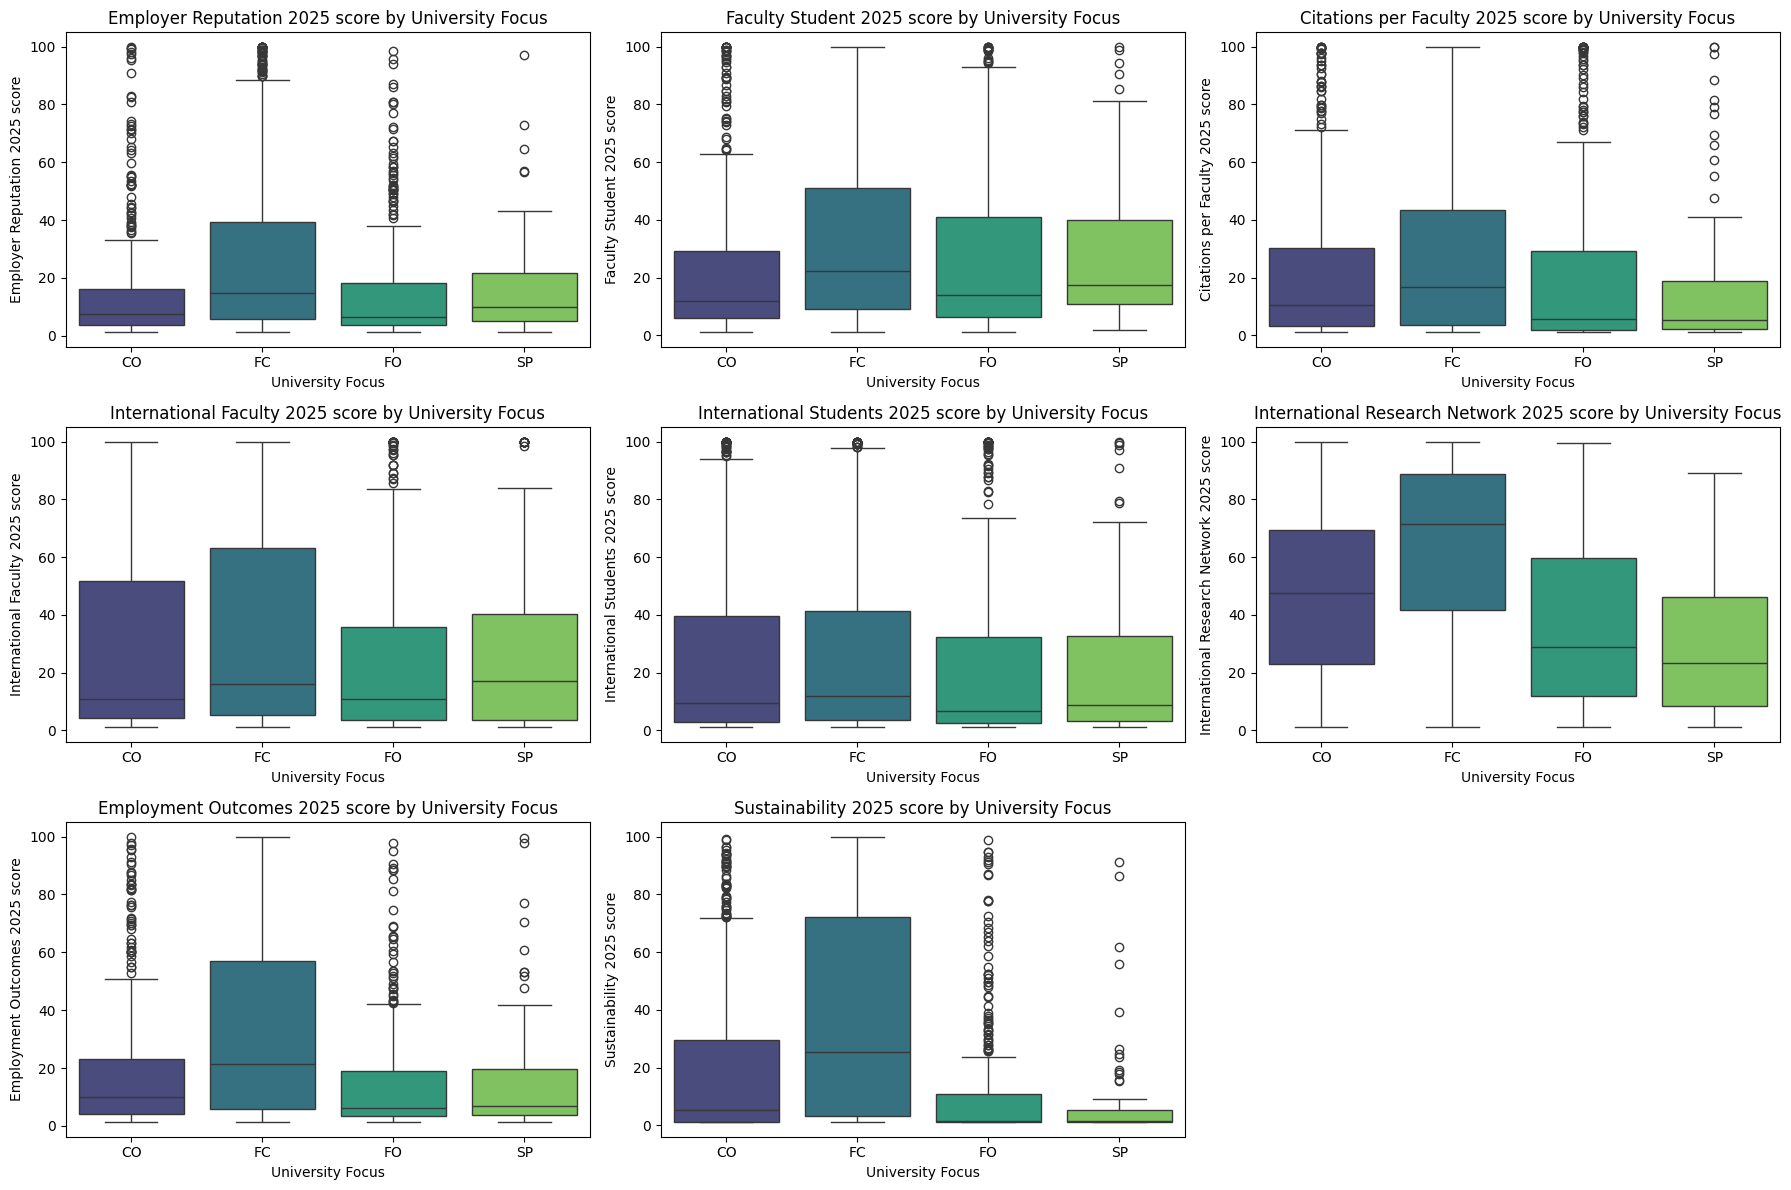

In [ ]:
# FOCUS Değişkeni
plt.figure(figsize=(18, 12))

for i, col in enumerate(score_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='FOCUS', y=col, data=data, palette='viridis')
    plt.title(f'{col} by University Focus')
    plt.xlabel('University Focus')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


### **1. "FOCUS" değişkeninin skorlarla ilişkisi**

**Employer Reputation 2025 score:**
*   Comprehensive (CO) ve Focused (FC) üniversiteler benzer dağılımlara sahipken, Specialist (SP) üniversiteler daha düşük değerlere sahiptir.

**Faculty Student 2025 score:**
*   Comprehensive (CO) üniversiteler genellikle daha yüksek puanlara sahiptir.

**Citations per Faculty 2025 score:**
*   Comprehensive (CO) üniversiteler daha yüksek puanlara sahiptir.

**International Faculty 2025 score:**
*   Comprehensive (CO) ve Focused (FC) üniversiteler daha yüksek puanlara sahiptir.

**International Students 2025 score:**
*   Comprehensive (CO) üniversiteler daha yüksek puanlara sahiptir.

**International Research Network 2025 score:**
*   Comprehensive (CO) üniversiteler daha yüksek puanlara sahiptir.

**Employment Outcomes 2025 score:**
*   Comprehensive (CO) üniversiteler genellikle daha yüksek puanlara sahiptir.

**Sustainability 2025 score:**
*   Comprehensive (CO) üniversiteler daha yüksek puanlara sahiptir.

<ipython-input-16-70b7e356efa1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STATUS', y=col, data=data, palette='viridis')
<ipython-input-16-70b7e356efa1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STATUS', y=col, data=data, palette='viridis')
<ipython-input-16-70b7e356efa1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STATUS', y=col, data=data, palette='viridis')
<ipython-input-16-70b7e356efa1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

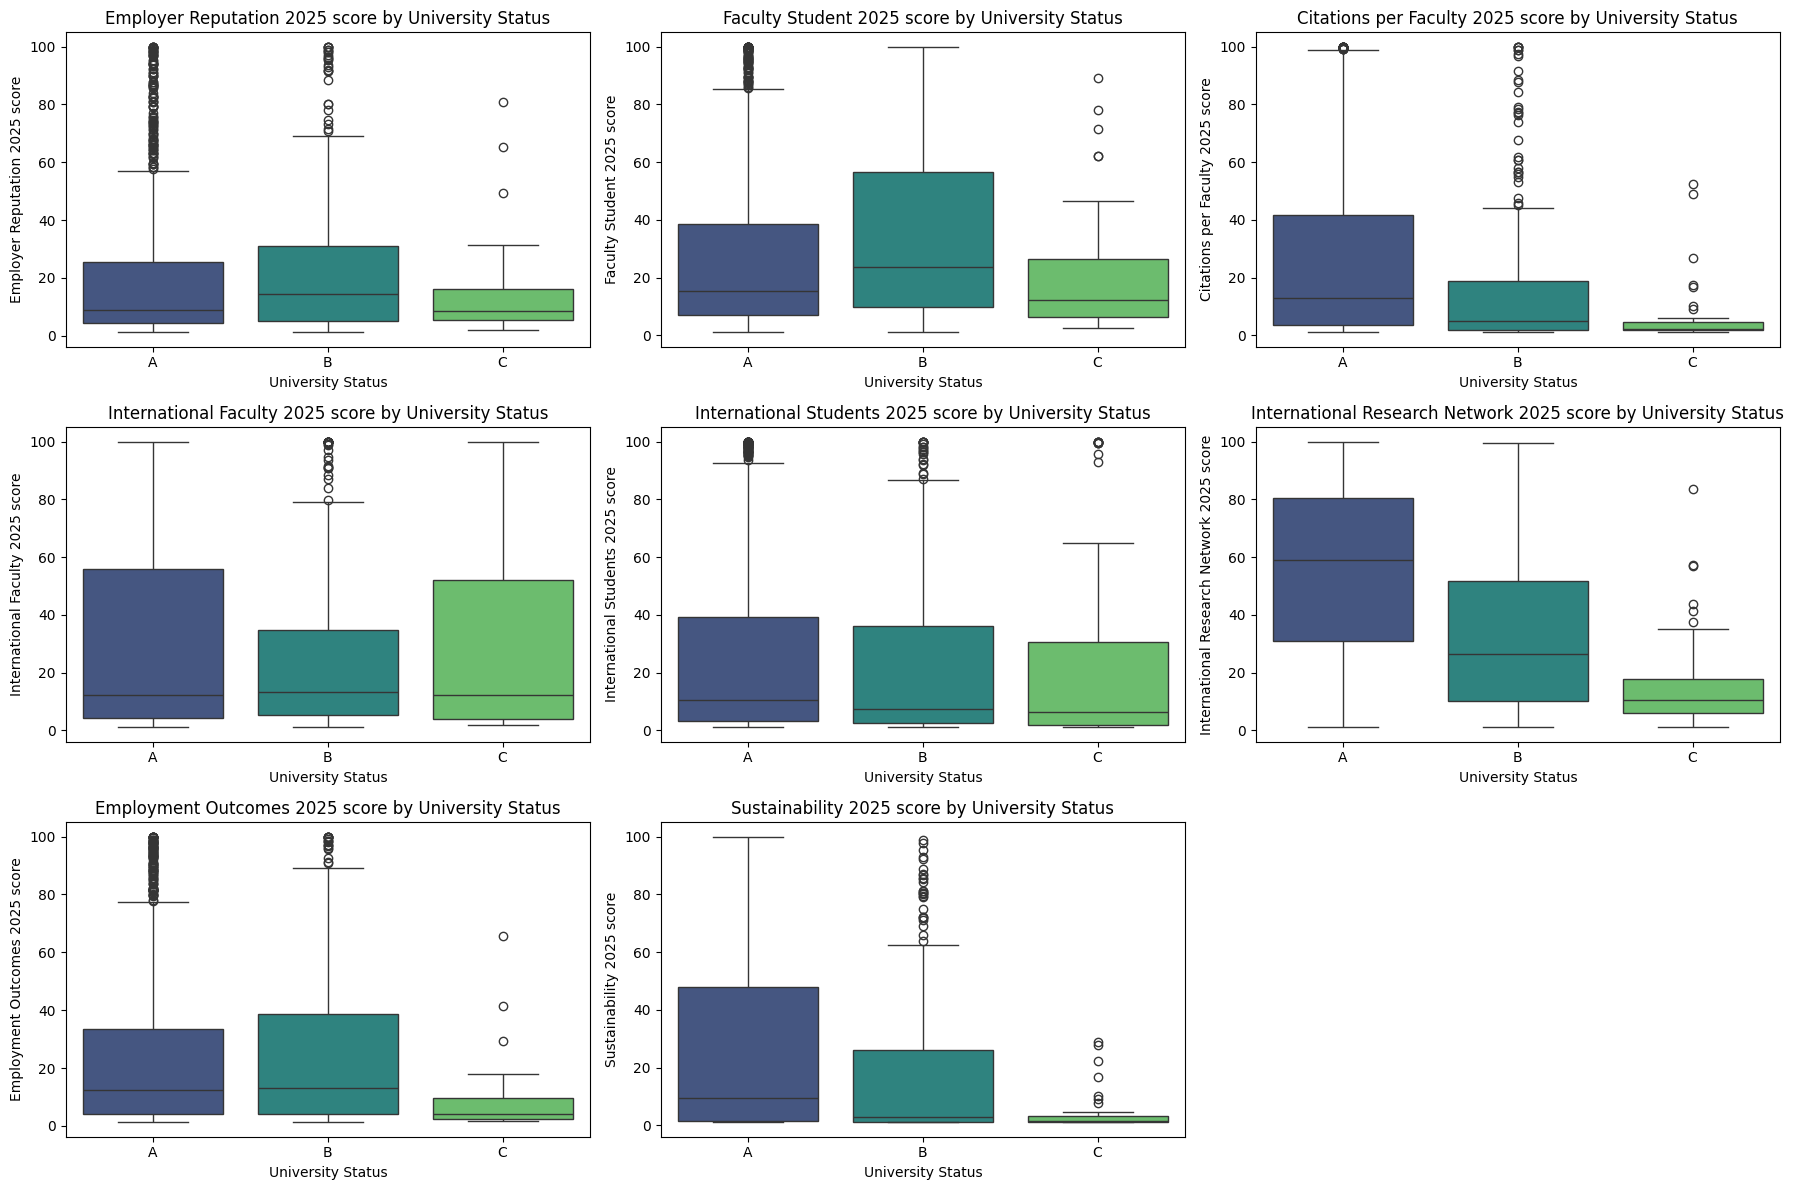

In [ ]:
#STATUS Değişkeni
plt.figure(figsize=(18, 12))

for i, col in enumerate(score_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='STATUS', y=col, data=data, palette='viridis')
    plt.title(f'{col} by University Status')
    plt.xlabel('University Status')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### **2. "STATUS" değişkeninin skorlarla ilişkisi**

**Employer Reputation 2025 score:**
*   Kamu (A) ve özel (B) üniversiteler benzer dağılımlara sahiptir.

**Faculty Student 2025 score:**
*   Kamu (A) ve özel (B) üniversiteler benzer dağılımlara sahiptir.

**Citations per Faculty 2025 score:**
*   Kamu (A) üniversiteler genellikle daha yüksek puanlara sahiptir.

**International Faculty 2025 score:**
*   Kamu (A) ve özel (B) üniversiteler benzer dağılımlara sahiptir.

**International Students 2025 score:**
*   Kamu (A) ve özel (B) üniversiteler benzer dağılımlara sahiptir.

**International Research Network 2025 score:**
*   Kamu (A) ve özel (B) üniversiteler benzer dağılımlara sahiptir.

**Employment Outcomes 2025 score:**
*   Kamu (A) ve özel (B) üniversiteler benzer dağılımlara sahiptir.

**Sustainability 2025 score:**
*   Kamu (A) üniversiteler genellikle daha yüksek puanlara sahiptir.

**Korelasyon analizi**

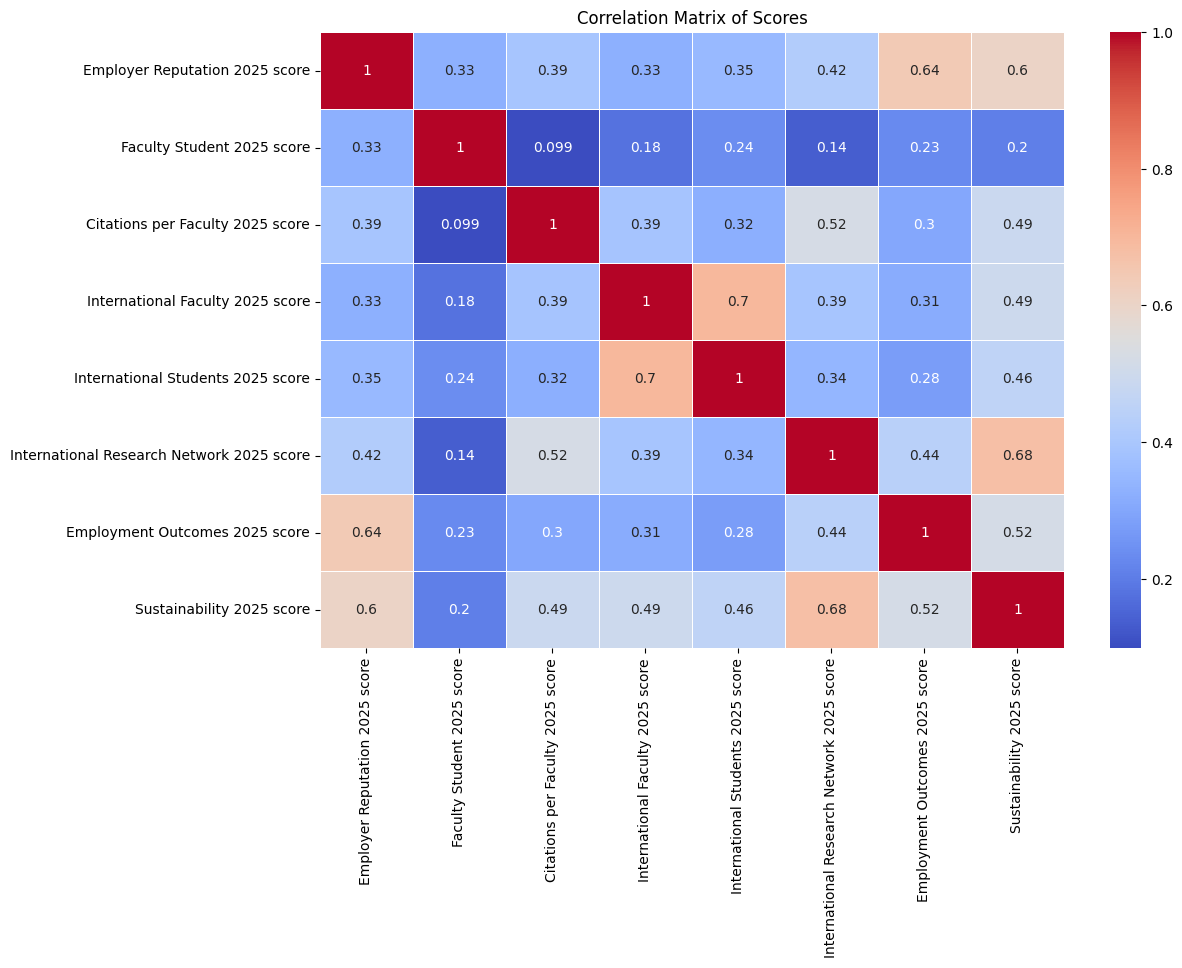

In [ ]:
correlation_matrix = data[score_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Scores')
plt.show()

## **Korelasyon Matrisi Yorumu**

**Korelasyon Matrisi Nedir?**

Korelasyon matrisi, farklı değişkenler arasındaki ilişkinin gücünü ve yönünü gösteren bir grafiksel temsildir. Matristeki her hücre, iki değişken arasındaki korelasyon katsayısını gösterir. Katsayı, -1 ile 1 arasında bir değer alır:

*   1: İki değişken arasında tam pozitif bir ilişki var.Birinin artması, diğerinin de artmasına neden olur.
*   0: İki değişken arasında herhangi bir ilişki yok.
*   -1: İki değişken arasında tam negatif bir ilişki var. Birinin artması, diğerinin azalmasına neden olur.


**Pozitif Korelasyonlar:**


1.  **Employer Reputation 2025 score, Employment Outcome 2025 score ve Sustainability 2025 score:** Bu üç gösterge arasında güçlü bir pozitif korelasyon var. Bu, işverenlerin itibarının yüksek olmasıyla mezunların istihdam olanaklarının ve kurumun sürdürülebilirlik performansının da yüksek olma eğiliminde olduğunu gösteriyor.

2.   **International Faculty 2025 score ve International Students 2025 score:** Bu iki gösterge arasında çok güçlü bir pozitif korelasyon var. Bu, uluslararası öğrenci sayısının artmasının genellikle uluslararası fakülte sayısının artmasıyla ilişkili olduğunu gösteriyor.

3.   **International Research Network 2025 score ve Citations per Faculty 2025 score:** Bu iki gösterge arasında orta düzeyde bir pozitif korelasyon var. Bu, uluslararası araştırma ağının genişlemesinin, genellikle makale başına atıf sayısını artırdığını gösteriyor.

**Negatif Korelasyonlar:**


1. **International Faculty 2025 score ve Sustainability 2025 score:** Bu iki gösterge arasında zayıf bir negatif korelasyon var. Bu, uluslararası fakülte sayısının artmasının, sürdürülebilirlik performansı üzerinde küçük bir negatif etkiye sahip olabileceğini gösteriyor. Ancak bu ilişki çok zayıf olduğu için kesin bir sonuç çıkarmak için daha fazla araştırma yapılması gerekir.














**İlişkilerin detaylı analizi**

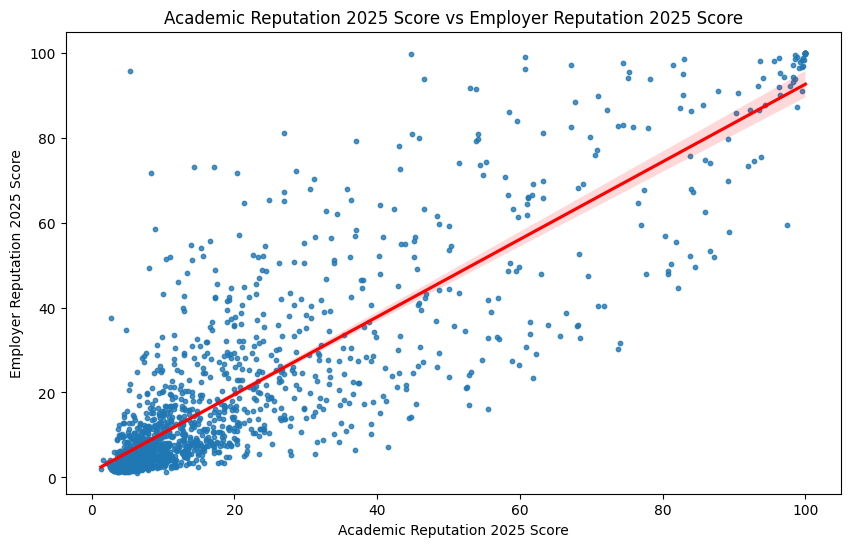

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Academic Reputation 2025 score', y='Employer Reputation 2025 score', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Academic Reputation 2025 Score vs Employer Reputation 2025 Score')
plt.xlabel('Academic Reputation 2025 Score')
plt.ylabel('Employer Reputation 2025 Score')
plt.show()


**Diğer puan çiftleri arasındaki dağılım grafiği**

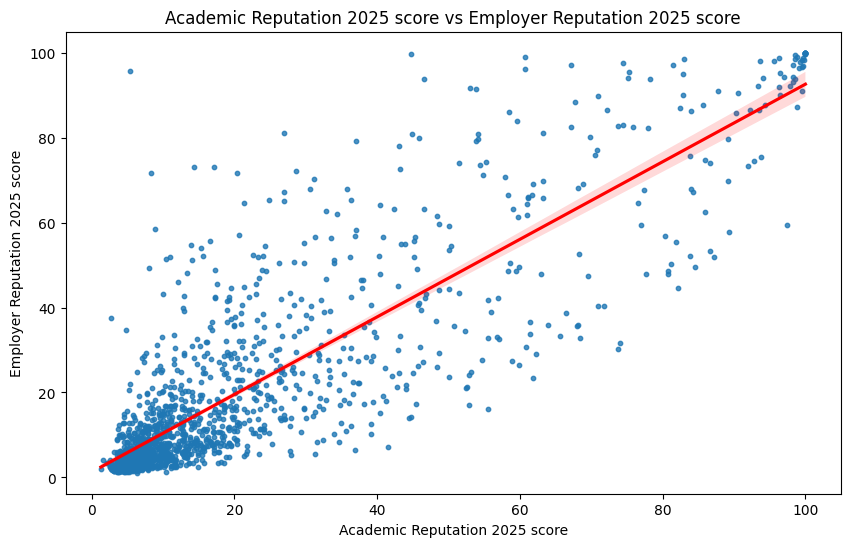

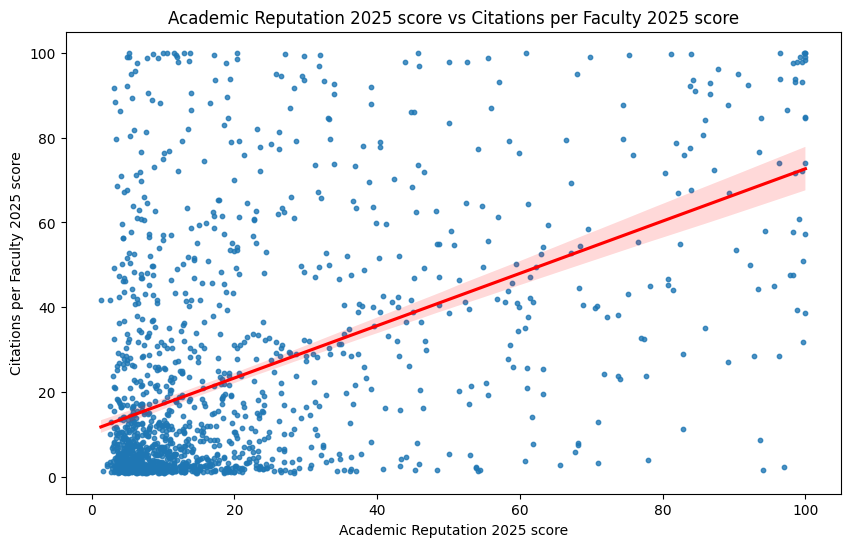

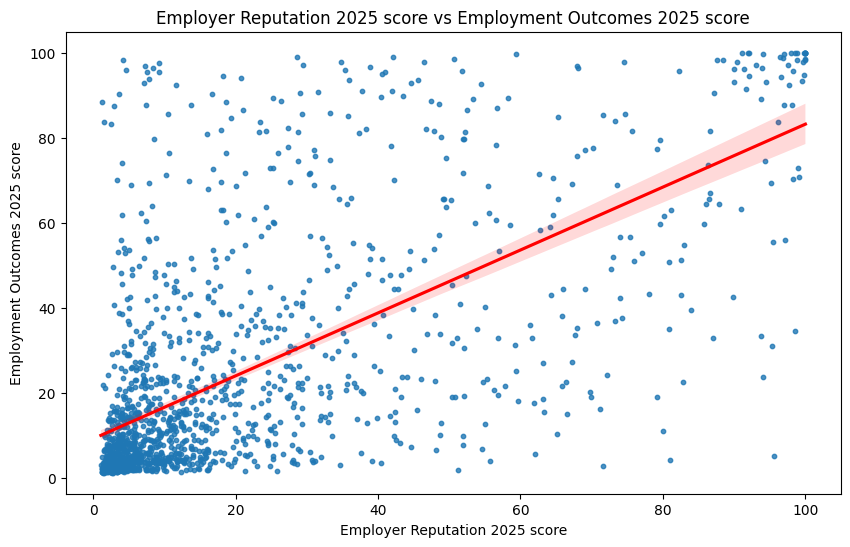

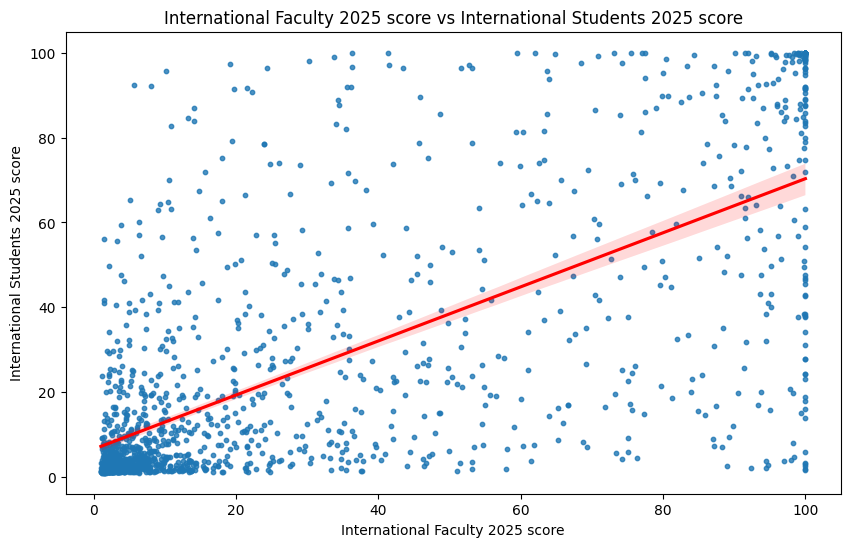

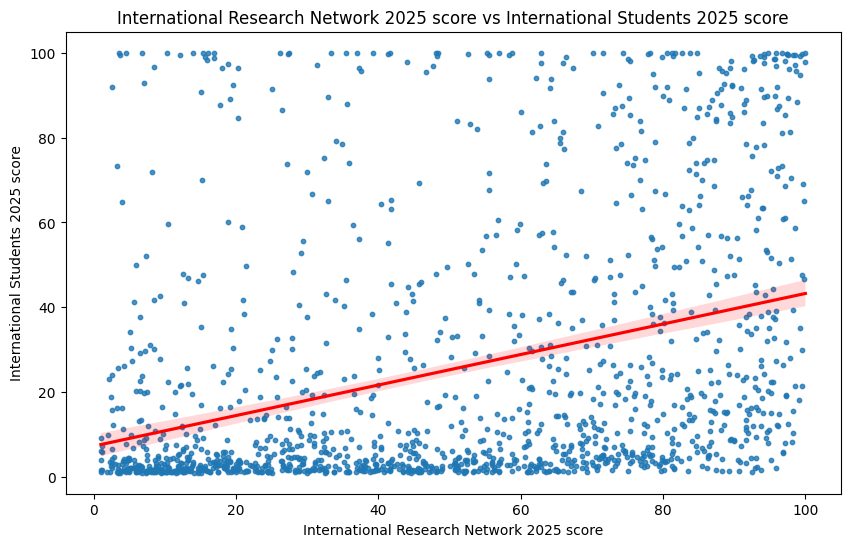

In [ ]:
# Function to create scatter plots with regression lines for score pairs
def plot_scatter_with_regression(x_col, y_col, data):
    plt.figure(figsize=(10, 6))
    sns.regplot(x=x_col, y=y_col, data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title(f'{x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Pairs of scores to plot
score_pairs = [
    ('Academic Reputation 2025 score', 'Employer Reputation 2025 score'),
    ('Academic Reputation 2025 score', 'Citations per Faculty 2025 score'),
    ('Employer Reputation 2025 score', 'Employment Outcomes 2025 score'),
    ('International Faculty 2025 score', 'International Students 2025 score'),
    ('International Research Network 2025 score', 'International Students 2025 score')
]

# Generate scatter plots with regression lines for the selected score pairs
for x_col, y_col in score_pairs:
    plot_scatter_with_regression(x_col, y_col, data)


**Academic Reputation 2025 score vs Employer Reputation 2025 score** **→** Güçlü pozitif bir ilişki.

**Academic Reputation 2025 score vs Citations per Faculty 2025 score** **→**
Daha zayıf bir pozitif ilişki.

**Employer Reputation 2025 score vs Employment Outcomes 2025 score** **→**
Güçlü pozitif bir ilişki.

**International Faculty 2025 score vs International Students 2025 score** **→**
Pozitif bir ilişki.

**International Research Network 2025 score vs International Students 2025 score** **→**
Pozitif bir ilişki.



**Kategorik Değişken ve Score Değerleri Arasında ANOVA**

In [ ]:
# Function to perform ANOVA for a given score and categorical variable
def perform_anova(data, score, cat_var):
    # Use the 'score' variable to reference the column name in the formula
    model = ols(f'{score} ~ C({cat_var})', data=data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    return anova_table

# Perform ANOVA for each score and categorical variable
anova_results = {}
categorical_variables = ['SIZE', 'FOCUS', 'RES.', 'STATUS']
# Assuming 'score_columns' is a list of valid column names in 'data'
score_columns = ['Academic Reputation 2025 score', 'Employer Reputation 2025 score', ...]

for score in score_columns:
    anova_results[score] = {}
    for cat_var in categorical_variables:
        anova_results[score][cat_var] = perform_anova(data, score, cat_var)


SyntaxError: invalid syntax (<unknown>, line 1)

**Kümeleme analizi**

**1.adım : Veri Hazırlığı**

Bu adımda;


1.   Skorlar üzerinde standartlaştırma (z-score standardizasyonu) uygulayacağız.
2.   Kategorik değişkenleri dışarıda bırakacağız.



In [ ]:
scores_data = data[score_columns]


scaler = StandardScaler()
scores_data_scaled = scaler.fit_transform(scores_data)


scores_data_scaled_df = pd.DataFrame(scores_data_scaled, columns=score_columns)
scores_data_scaled_df.head()

,Employer Reputation 2025 score,Faculty Student 2025 score,Citations per Faculty 2025 score,International Faculty 2025 score,International Students 2025 score,International Research Network 2025 score,Employment Outcomes 2025 score,Sustainability 2025 score
0,3.373557,2.603672,2.745608,1.998287,1.969242,1.536372,2.785982,2.404394
1,3.352528,2.538464,2.526668,2.018686,2.380978,1.583263,2.544597,2.426928
2,3.373557,2.603672,2.200051,1.963319,2.319861,1.670345,2.785982,1.953716
3,3.373557,2.469633,2.745608,1.263951,1.396673,1.656948,2.785982,1.934401
4,3.373557,2.603672,2.192873,2.018686,2.226577,1.646900,2.785982,1.947277


**2.adım : K-means Kümeleme:**

Bu adımda;


1.  Küme sayısını belirlemek için Dirsek (Elbow) yöntemi uygulayacağız.
2.  En uygun küme sayısını belirledikten sonra k-means kümelemesi gerçekleştireceğiz.

In [ ]:
missing_values = scores_data_scaled_df.isnull().sum()
missing_values

Employer Reputation 2025 score                 0
Faculty Student 2025 score                     0
Citations per Faculty 2025 score               0
International Faculty 2025 score             100
International Students 2025 score             58
International Research Network 2025 score      1
Employment Outcomes 2025 score                 0
Sustainability 2025 score                     19
dtype: int64



*   **International Faculty 2025 score:** 100 eksik değer
*   **International Students 2025 score:** 58 eksik değer
*   **International Research Network 2025 score:** 1 eksik değer
*   **Sustainability 2025 score:**19 eksik değer




In [ ]:
# Eksik değerleri doldurma
scores_data_filled = scores_data_scaled_df.fillna(scores_data_scaled_df.mean())
missing_values_after_fill = scores_data_filled.isnull().sum()
missing_values_after_fill

Employer Reputation 2025 score               0
Faculty Student 2025 score                   0
Citations per Faculty 2025 score             0
International Faculty 2025 score             0
International Students 2025 score            0
International Research Network 2025 score    0
Employment Outcomes 2025 score               0
Sustainability 2025 score                    0
dtype: int64

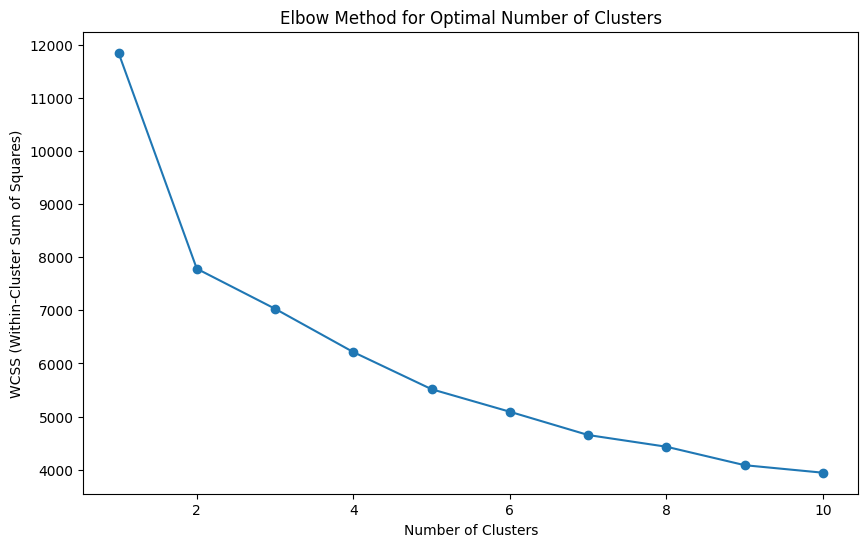

In [ ]:
# Dirsek (Elbow) Yöntemi ve K-means Kümeleme
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scores_data_filled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

Dirsek (Elbow) yöntemi grafiğine göre, optimal küme sayısını belirleyebiliriz. Grafik, genellikle "dirsek" şeklindeki kırılma noktasında belirginleşir. Bu grafikte, 3 veya 4 küme makul bir seçim gibi görünüyor.

In [ ]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(scores_data_filled)

data['Cluster'] = kmeans.labels_
data.head()


,Unnamed: 1,Location,SIZE,FOCUS,RES.,STATUS,Academic Reputation 2025 score,Employer Reputation 2025 score,Faculty Student 2025 score,Citations per Faculty 2025 score,International Faculty 2025 score,International Students 2025 score,International Research Network 2025 score,Employment Outcomes 2025 score,Sustainability 2025 score,rank,Cluster
University,,,,,,,,,,,,,,,,,
Massachusetts Institute of Technology (MIT),US,United States,M,CO,VH,B,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,1,2
Imperial College London,UK,United Kingdom,L,FC,VH,A,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,2,2
University of Oxford,UK,United Kingdom,L,FC,VH,A,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,3,2
Harvard University,US,United States,L,FC,VH,B,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,4,2
University of Cambridge,UK,United Kingdom,L,FC,VH,A,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,5,2


In [ ]:
# Küme Özelliklerini İnceleme
cluster_means = data.groupby('Cluster')[score_columns].mean()
cluster_means


,Employer Reputation 2025 score,Faculty Student 2025 score,Citations per Faculty 2025 score,International Faculty 2025 score,International Students 2025 score,International Research Network 2025 score,Employment Outcomes 2025 score,Sustainability 2025 score
Cluster,,,,,,,,
0,15.055093,71.663426,11.627778,27.062437,26.188350,39.731019,16.956481,12.070142
1,10.003972,13.954752,8.340993,11.136120,8.719697,32.448864,14.221277,5.918958
2,59.993724,47.460251,50.917573,64.348954,56.739749,84.914226,64.356067,75.672385
3,14.857726,16.376093,43.044898,46.056156,36.038235,68.727405,19.648397,33.097668


In [ ]:
numerical_columns = data.select_dtypes(include=['number']).columns
data_values = data[numerical_columns].values

imputer = SimpleImputer(strategy='mean')
data_values_imputed = imputer.fit_transform(data_values)

labels = kmeans.fit_predict(data_values_imputed)

Text(0, 0.5, 'Euclidean distances')

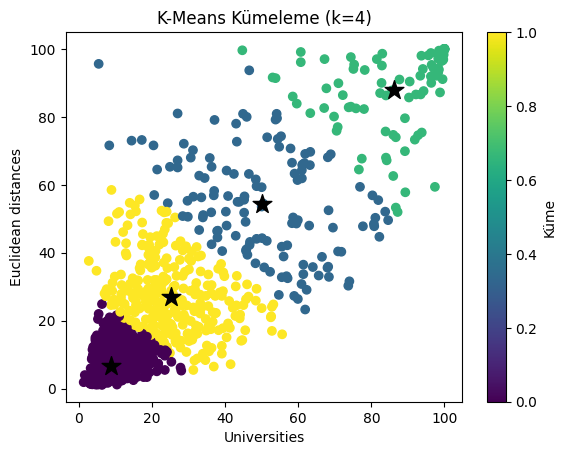

In [ ]:
data_values = data.values
labels = kmeans.fit_predict(data_values_imputed[:, :2])
s = kmeans.labels_

plt.scatter(data_values_imputed[:, 0], data_values_imputed[:, 1], c=labels, cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black')


plt.colorbar(label='Küme')
plt.title('K-Means Kümeleme (k=4)')
plt.xlabel('Universities')
plt.ylabel('Euclidean distances')

**Hiyerarşik Kümeleme ve Dendrogram
Oluşturma**

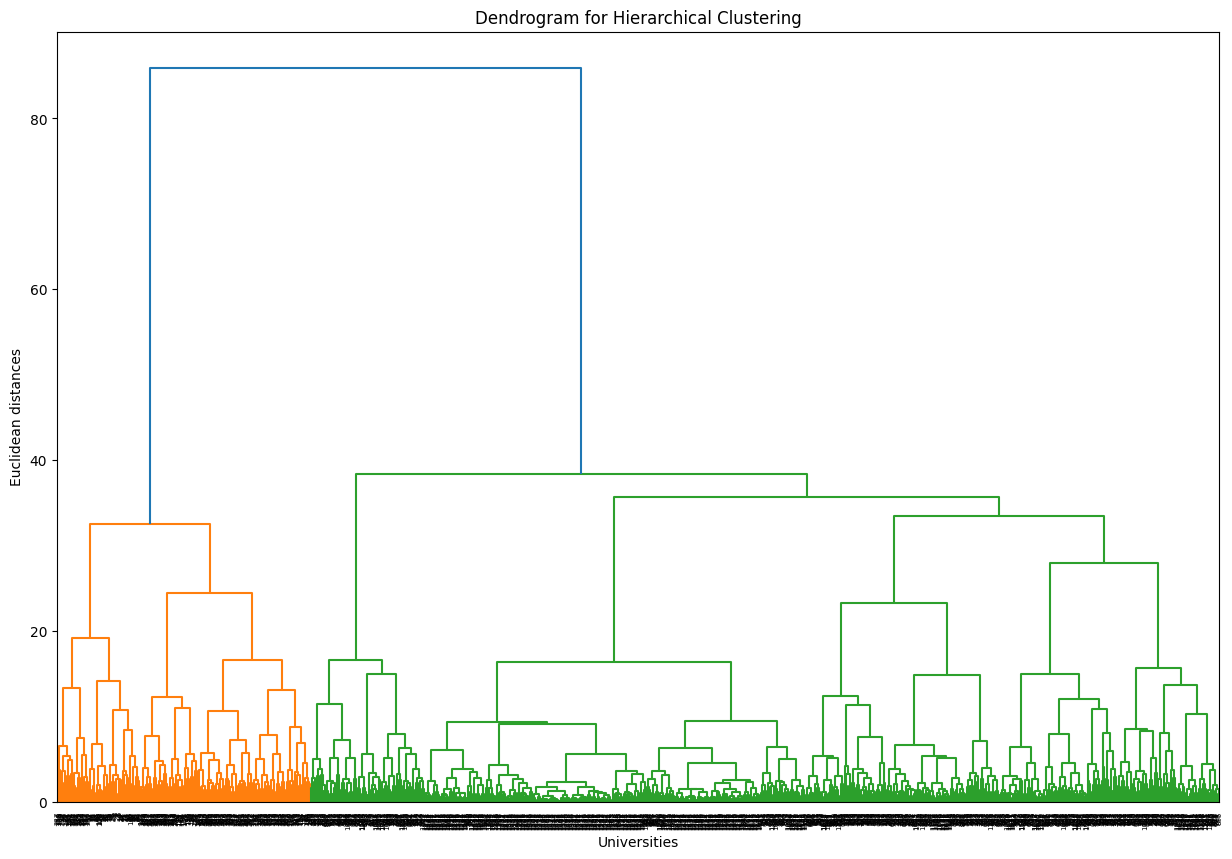

In [ ]:
plt.figure(figsize=(15, 10))
dendrogram = sch.dendrogram(sch.linkage(scores_data_filled, method='ward'))
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Universities')
plt.ylabel('Euclidean distances')
plt.show()